In [25]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import random


🚗 Q-Learning Simplificat pentru Drumuri Optime
Antrenez pentru drumul București → Constanța
Episodul 200: Am terminat antrenamentul parțial
Episodul 400: Am terminat antrenamentul parțial
Episodul 600: Am terminat antrenamentul parțial
Episodul 800: Am terminat antrenamentul parțial
Episodul 1000: Am terminat antrenamentul parțial

Caut drumul optim de la București la Constanța...
Nu am găsit drum!

DRUMUL GĂSIT:
1. București → Ploiești (0.5 km)
2. Ploiești → Brașov (0.8 km)
3. Brașov → Craiova (2.2 km)
4. Craiova (DESTINAȚIE)

Distanța totală: 3.5 km
Numărul de orașe: 4


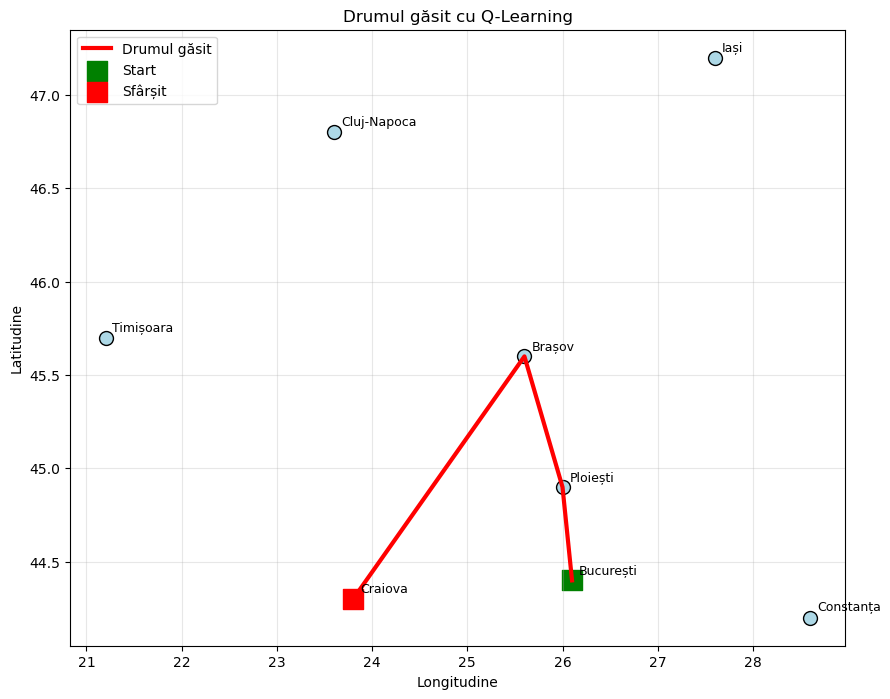

In [37]:

class QLearningSimplificat:
    def __init__(self):
        # Orașele României și coordonatele lor
        self.orase = {
            'București': (44.4, 26.1),
            'Cluj-Napoca': (46.8, 23.6),
            'Timișoara': (45.7, 21.2),
            'Iași': (47.2, 27.6),
            'Constanța': (44.2, 28.6),
            'Craiova': (44.3, 23.8),
            'Brașov': (45.6, 25.6),
            'Ploiești': (44.9, 26.0)
        }
        
        self.lista_orase = list(self.orase.keys())
        self.numar_orase = len(self.lista_orase)
        
        # Calculez distanțele dintre toate orașele
        self.distante = self._calculeaza_distante()
        
        # Conexiunile (care orașe sunt conectate)
        self.conexiuni = self._creaza_conexiuni()
        
        # Parametrii Q-Learning
        self.rata_invatare = 0.1      # Cât de repede învață
        self.discount = 0.9           # Cât de important e viitorul
        self.explorare = 0.2          # Cât de mult explorează
        
        # Tabelul Q (inima algoritmului)
        self.tabel_q = np.zeros((self.numar_orase, self.numar_orase))
    
    def _calculeaza_distante(self):
        """Calculez distanța dintre fiecare pereche de orașe"""
        distante = np.zeros((self.numar_orase, self.numar_orase))
        
        for i in range(self.numar_orase):
            for j in range(self.numar_orase):
                if i != j:
                    # Coordonatele celor două orașe
                    oras1 = self.orase[self.lista_orase[i]]
                    oras2 = self.orase[self.lista_orase[j]]
                    
                    # Calculez distanța euclidiana
                    distanta = np.sqrt((oras1[0] - oras2[0])**2 + (oras1[1] - oras2[1])**2)
                    distante[i][j] = distanta
        
        return distante
    
    def _creaza_conexiuni(self):
        """Creez conexiunile - fiecare oraș se poate conecta la vecinii apropiați"""
        conexiuni = {}
        distanta_maxima = 2.5  # Doar orașele apropiate sunt conectate
        
        for i in range(self.numar_orase):
            conexiuni[i] = []
            for j in range(self.numar_orase):
                if i != j and self.distante[i][j] <= distanta_maxima:
                    conexiuni[i].append(j)
            
            # Dacă un oraș nu are conexiuni, îl conectez la cel mai apropiat
            if not conexiuni[i]:
                distante_la_oras = [(j, self.distante[i][j]) for j in range(self.numar_orase) if i != j]
                cel_mai_apropiat = min(distante_la_oras, key=lambda x: x[1])[0]
                conexiuni[i].append(cel_mai_apropiat)
        
        return conexiuni
    
    def obtine_actiuni_valide(self, oras_curent, orase_vizitate):
        """Returnez orașele la care pot merge din orașul curent"""
        orase_conectate = self.conexiuni[oras_curent]
        return [oras for oras in orase_conectate if oras not in orase_vizitate]
    
    def alege_actiune(self, oras_curent, actiuni_valide, destinatie):
        """Aleg următorul oraș folosind strategia epsilon-greedy"""
        
        # Uneori explorez aleatoriu (explorare)
        if random.random() < self.explorare:
            # Dacă destinația e disponibilă, o prefer
            if destinatie in actiuni_valide:
                return destinatie
            return random.choice(actiuni_valide)
        
        # Altfel aleg cea mai bună opțiune din tabelul Q (exploatare)
        else:
            valori_q = [self.tabel_q[oras_curent][actiune] for actiune in actiuni_valide]
            cel_mai_bun_index = np.argmax(valori_q)
            return actiuni_valide[cel_mai_bun_index]
    
    def antreneaza(self, episoade=1000, start='București', end='Constanța'):
        """Antrenez agentul să găsească drumul optim"""
        
        start_index = self.lista_orase.index(start)
        end_index = self.lista_orase.index(end)
        
        print(f"Antrenez pentru drumul {start} → {end}")
        
        for episod in range(episoade):
            # Încep din orașul de start
            oras_curent = start_index
            orase_vizitate = {start_index}
            drum = [start_index]
            
            # Încerc să ajung la destinație
            while oras_curent != end_index and len(drum) < 20:  # Max 20 pași
                
                # Văd la ce orașe pot merge
                actiuni_valide = self.obtine_actiuni_valide(oras_curent, orase_vizitate)
                
                # Adaug destinația dacă e conectată direct
                if end_index in self.conexiuni[oras_curent]:
                    actiuni_valide.append(end_index)
                
                # Dacă nu am unde să merg, mă opresc
                if not actiuni_valide:
                    break
                
                # Aleg următorul oraș
                urmatorul_oras = self.alege_actiune(oras_curent, actiuni_valide, end_index)
                
                # Calculez recompensa
                distanta = self.distante[oras_curent][urmatorul_oras]
                recompensa = -distanta  # Distanțe mari = recompense negative
                
                # Bonus mare dacă ajung la destinație
                if urmatorul_oras == end_index:
                    recompensa += 100
                
                # Actualizez tabelul Q (aici se întâmplă învățarea!)
                if urmatorul_oras == end_index:
                    # Am ajuns la destinație, nu mai sunt acțiuni viitoare
                    valoare_viitoare_maxima = 0
                else:
                    # Calculez cea mai bună valoare viitoare posibilă
                    actiuni_viitoare = self.obtine_actiuni_valide(urmatorul_oras, orase_vizitate | {urmatorul_oras})
                    if actiuni_viitoare:
                        valori_viitoare = [self.tabel_q[urmatorul_oras][actiune] for actiune in actiuni_viitoare]
                        valoare_viitoare_maxima = max(valori_viitoare)
                    else:
                        valoare_viitoare_maxima = -50  # Penalizare pentru impas
                
                # Formula Q-Learning
                valoare_veche = self.tabel_q[oras_curent][urmatorul_oras]
                valoare_noua = recompensa + self.discount * valoare_viitoare_maxima
                self.tabel_q[oras_curent][urmatorul_oras] = (
                    valoare_veche + self.rata_invatare * (valoare_noua - valoare_veche)
                )
                
                # Merg la următorul oraș
                oras_curent = urmatorul_oras
                if urmatorul_oras != end_index:
                    orase_vizitate.add(urmatorul_oras)
                drum.append(urmatorul_oras)
            
            # Afișez progresul la fiecare 200 de episoade
            if (episod + 1) % 200 == 0:
                print(f"Episodul {episod + 1}: Am terminat antrenamentul parțial")
    
    def gaseste_drumul_optim(self, start='București', end='Constanța'):
        """Găsesc cel mai bun drum folosind cunoștințele învățate"""
        
        start_index = self.lista_orase.index(start)
        end_index = self.lista_orase.index(end)
        
        oras_curent = start_index
        orase_vizitate = {start_index}
        drum = [start_index]
        distanta_totala = 0
        
        print(f"\nCaut drumul optim de la {start} la {end}...")
        
        while oras_curent != end_index and len(drum) < 20:
            actiuni_valide = self.obtine_actiuni_valide(oras_curent, orase_vizitate)
            
            # Adaug destinația dacă e conectată
            if end_index in self.conexiuni[oras_curent]:
                actiuni_valide.append(end_index)
            
            if not actiuni_valide:
                print("Nu am găsit drum!")
                break
            
            # Aleg întotdeauna cea mai bună opțiune (fără explorare)
            if end_index in actiuni_valide:
                urmatorul_oras = end_index
            else:
                valori_q = [self.tabel_q[oras_curent][actiune] for actiune in actiuni_valide]
                urmatorul_oras = actiuni_valide[np.argmax(valori_q)]
            
            # Calculez distanța
            distanta = self.distante[oras_curent][urmatorul_oras]
            distanta_totala += distanta
            
            # Merg la următorul oraș
            oras_curent = urmatorul_oras
            if urmatorul_oras != end_index:
                orase_vizitate.add(urmatorul_oras)
            drum.append(urmatorul_oras)
        
        return drum, distanta_totala
    
    def afiseaza_rezultate(self, drum, distanta_totala):
        """Afișez rezultatele în mod vizual și text"""
        
        print(f"\n{'='*50}")
        print("DRUMUL GĂSIT:")
        print(f"{'='*50}")
        
        for i, oras_index in enumerate(drum):
            nume_oras = self.lista_orase[oras_index]
            if i < len(drum) - 1:
                urmatorul_oras = self.lista_orase[drum[i + 1]]
                distanta_segment = self.distante[oras_index][drum[i + 1]]
                print(f"{i+1}. {nume_oras} → {urmatorul_oras} ({distanta_segment:.1f} km)")
            else:
                print(f"{i+1}. {nume_oras} (DESTINAȚIE)")
        
        print(f"\nDistanța totală: {distanta_totala:.1f} km")
        print(f"Numărul de orașe: {len(drum)}")
        
        # Creez o hartă simplă
        self._deseneaza_harta(drum)
    
    def _deseneaza_harta(self, drum):
        """Desenez o hartă simplă cu drumul găsit"""
        plt.figure(figsize=(10, 8))
        
        # Desenez toate orașele
        for nume_oras, coordonate in self.orase.items():
            plt.scatter(coordonate[1], coordonate[0], s=100, c='lightblue', edgecolor='black')
            plt.annotate(nume_oras, (coordonate[1], coordonate[0]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
        
        # Desenez drumul găsit
        coordonate_drum = []
        for oras_index in drum:
            nume_oras = self.lista_orase[oras_index]
            coordonate = self.orase[nume_oras]
            coordonate_drum.append(coordonate)
        
        if len(coordonate_drum) > 1:
            coordonate_drum = np.array(coordonate_drum)
            plt.plot(coordonate_drum[:, 1], coordonate_drum[:, 0], 'r-', linewidth=3, label='Drumul găsit')
            
            # Marchează startul și sfârșitul
            plt.scatter(coordonate_drum[0, 1], coordonate_drum[0, 0], 
                       s=200, c='green', marker='s', label='Start')
            plt.scatter(coordonate_drum[-1, 1], coordonate_drum[-1, 0], 
                       s=200, c='red', marker='s', label='Sfârșit')
        
        plt.xlabel('Longitudine')
        plt.ylabel('Latitudine')
        plt.title('Drumul găsit cu Q-Learning')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# Exemplu de utilizare
if __name__ == "__main__":
    print("🚗 Q-Learning Simplificat pentru Drumuri Optime")
    print("=" * 50)
    
    # Creez agentul
    agent = QLearningSimplificat()
    
    # Antrenez agentul
    agent.antreneaza(episoade=1000, start='București', end='Constanța')
    
    # Găsesc drumul optim
    drumul_optim, distanta = agent.gaseste_drumul_optim('București', 'Constanța')
    
    # Afișez rezultatele
    agent.afiseaza_rezultate(drumul_optim, distanta)


🚗 Q-Learning Simplificat pentru Drumuri Optime
Antrenez pentru drumul București → Constanța
Episodul 200: Am terminat antrenamentul parțial
Episodul 400: Am terminat antrenamentul parțial
Episodul 600: Am terminat antrenamentul parțial
Episodul 800: Am terminat antrenamentul parțial
Episodul 1000: Am terminat antrenamentul parțial

Caut drumul optim de la București la Constanța...
Nu am găsit drum!

DRUMUL GĂSIT:
1. București → Ploiești (0.5 km)
2. Ploiești → Brașov (0.8 km)
3. Brașov → Craiova (2.2 km)
4. Craiova (DESTINAȚIE)

Distanța totală: 3.5 km
Numărul de orașe: 4


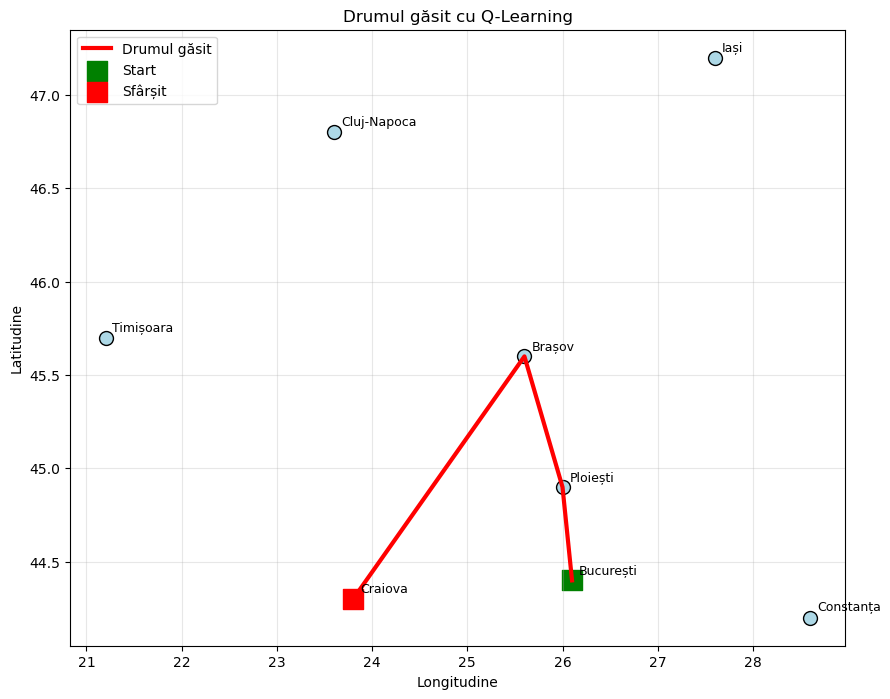